In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [5]:
DATA_PATH = 'dataframes/energy.xlsx'

df = pd.read_excel(DATA_PATH, index_col='DATE', parse_dates=True)
df.head(3)

,energy
DATE,
1985-01-01,71.592
1985-02-01,69.787
1985-03-01,61.679


In [4]:
df.shape

(408, 1)

In [5]:
df.describe()

,energy
count,408.000000
mean,88.062232
std,15.168540
min,54.616500
25%,76.499750
50%,88.940450
75%,99.733200
max,126.362600


In [6]:
df.index.min(), df.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

<Axes: xlabel='DATE'>

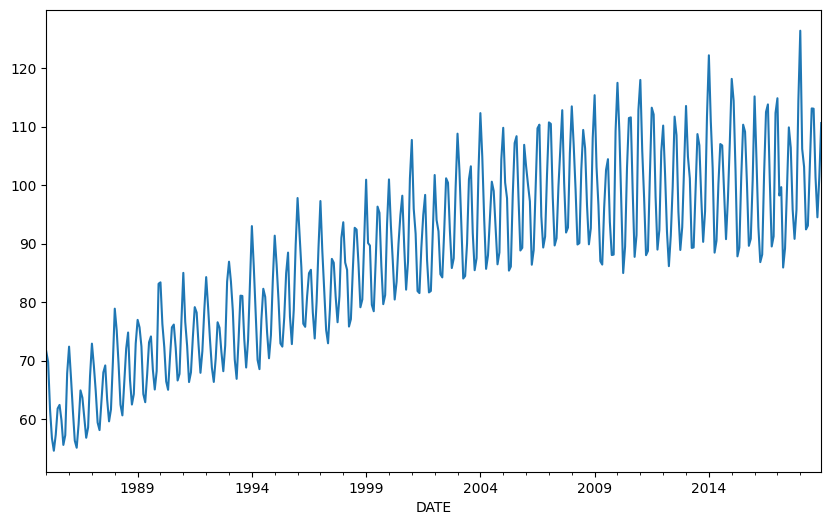

In [7]:
df['energy'].plot(figsize=(10, 6))

<Figure size 1400x600 with 0 Axes>

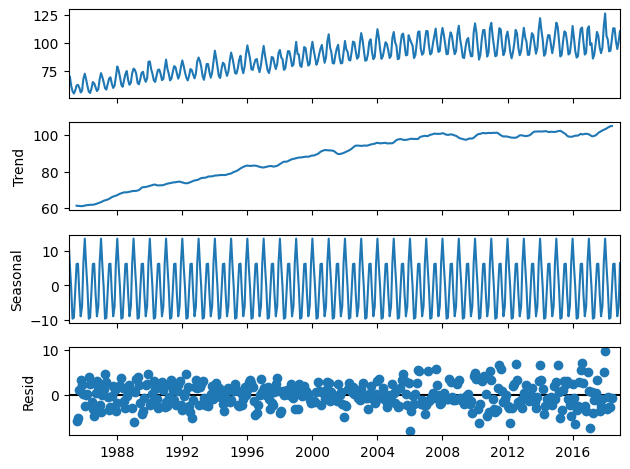

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df)

fig = plt.figure(figsize=(14, 6))
fig = result.plot()

In [9]:
'''Uma série temporal estacionária é aquela cujas propriedades estatísticas (média, variância, etc.)
não dependem do tempo em que a série é observada. Se p value > 0.05, a série é não estacionária.'''

from statsmodels.tsa.stattools import adfuller


result = adfuller(df['energy'].dropna())
print(f'ADF test  -> {result[0]}\np value   -> {result[1]}\np value % -> {(result[1]*100).round(2)}%')
print(result)

ADF test  -> -2.252399047046608
p value   -> 0.18777984601967346
p value % -> 18.78%
(-2.252399047046608, 0.18777984601967346, 15, 392, {'1%': -3.44714244478345, '5%': -2.8689414326247995, '10%': -2.5707127699396084}, 1885.4250431113953)


In [10]:
'''O método .diff() em Pandas é usado para calcular a diferença entre elementos consecutivos em uma
série ou em um DataFrame ao longo de um eixo específico. Ele calcula a diferença entre o valor atual
e o valor anterior na série ou DataFrame.'''

df_diff         = df.copy()
df_diff['diff'] = df['energy'].diff()
df_diff.head()

,energy,diff
DATE,,
1985-01-01,71.5920,NaN
1985-02-01,69.7870,-1.8050
1985-03-01,61.6790,-8.1080
1985-04-01,56.7479,-4.9311
1985-05-01,54.6165,-2.1314


In [11]:
result = adfuller(df['energy'].diff().dropna())
print(f'ADF test  -> {result[0]}\np value   -> {result[1]}\np value % -> {(result[1]*100).round(11)}%')

ADF test  -> -7.450892277526375
p value   -> 5.674569955854434e-11
p value % -> 5.67e-09%


In [12]:
fit_arima = auto_arima(df, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                      seasonal=True, m=6, D=1,
                      start_P=1, start_Q=1, max_P=2, max_Q=2,
                      information_criterion='aic', trace=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=1968.148, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=2494.965, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=2053.701, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=2128.799, Time=0.20 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=2064.883, Time=0.35 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=1928.298, Time=0.61 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=0.49 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=1868.200, Time=1.30 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=1866.400, Time=1.05 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=2014.153, Time=0.60 sec
 ARIMA(0,1,1)(1,1,2)[6]             : AIC=1916.488, Time=0.79 sec
 ARIMA(1,1,0)(1,1,2)[6]             : AIC=1936.850, Time=0.71 sec
 ARIMA(2,1,1)(1,1,2)[6]             : AIC=1868.120, Time=1.42 sec
 ARIMA(1,1,2)(1,1,2)[6]             : AIC=1

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax  = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 2, 6))
result_sarimax = model_sarimax.fit()

c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jeanl\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
print(result_sarimax.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                 energy   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 6)   Log Likelihood                -927.200
Date:                                Mon, 25 Mar 2024   AIC                           1866.400
Time:                                        22:52:52   BIC                           1890.364
Sample:                                    01-01-1985   HQIC                          1875.889
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5125      0.042     12.156      0.000       0.430       0.595
ma.

In [15]:
predict      = result_sarimax.get_prediction(start=-12)
predict_mean = predict.predicted_mean
predict_mean[0]

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\2804960489.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict_mean[0]


119.7999629209402

In [16]:
conf_interval = predict.conf_int()
limit_min     = conf_interval.iloc[:,0]
limit_max     = conf_interval.iloc[:,1]

limit_min[0], limit_max[0]

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\4132576603.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limit_min[0], limit_max[0]


(115.14474798330669, 124.45517785857372)

In [17]:
date_predict = np.asarray(predict_mean.index)
date         = np.asarray(df.index)

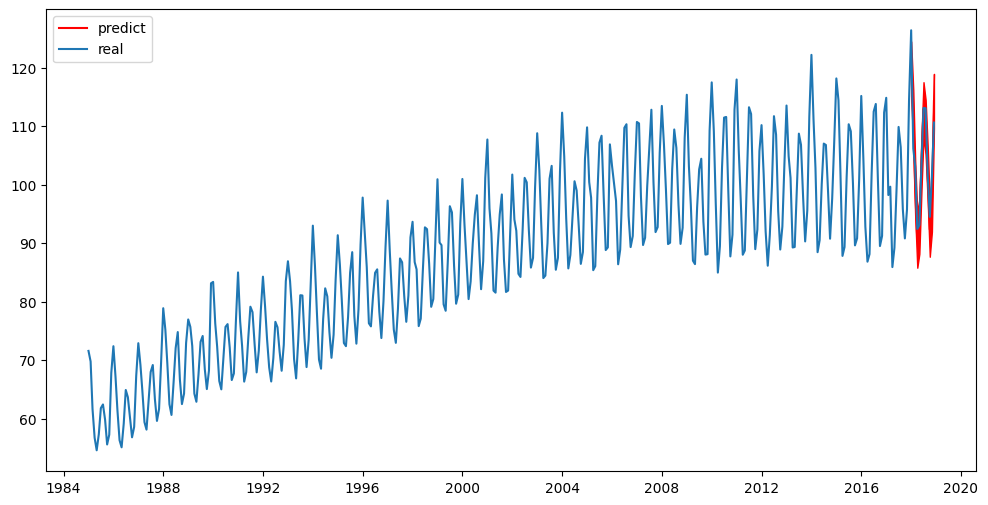

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(date_predict, predict_mean.values, color='red', label='predict')
plt.fill_between(date_predict, limit_min, limit_max, color='red')
plt.plot(date, df.values, label='real')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error

print(f'MAE -> {mean_absolute_error(df[-12:].values, predict_mean.values)}')

MAE -> 2.7071206701063253


In [20]:
forecast      = result_sarimax.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_mean[10], forecast_mean.size

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\751961636.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_mean[10], forecast_mean.size


(97.2487194992697, 12)

In [21]:
conf_interval_fc = forecast.conf_int()
limit_min_fc     = conf_interval_fc.iloc[:,0]
limit_max_fc     = conf_interval_fc.iloc[:,1]

limit_min_fc[10], limit_max_fc[10]

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\3545086732.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limit_min_fc[10], limit_max_fc[10]


(91.38813142795122, 103.10930757058817)

In [22]:
date_forecast = np.asarray(forecast_mean.index)
predict_dates = np.asarray(predict_mean)

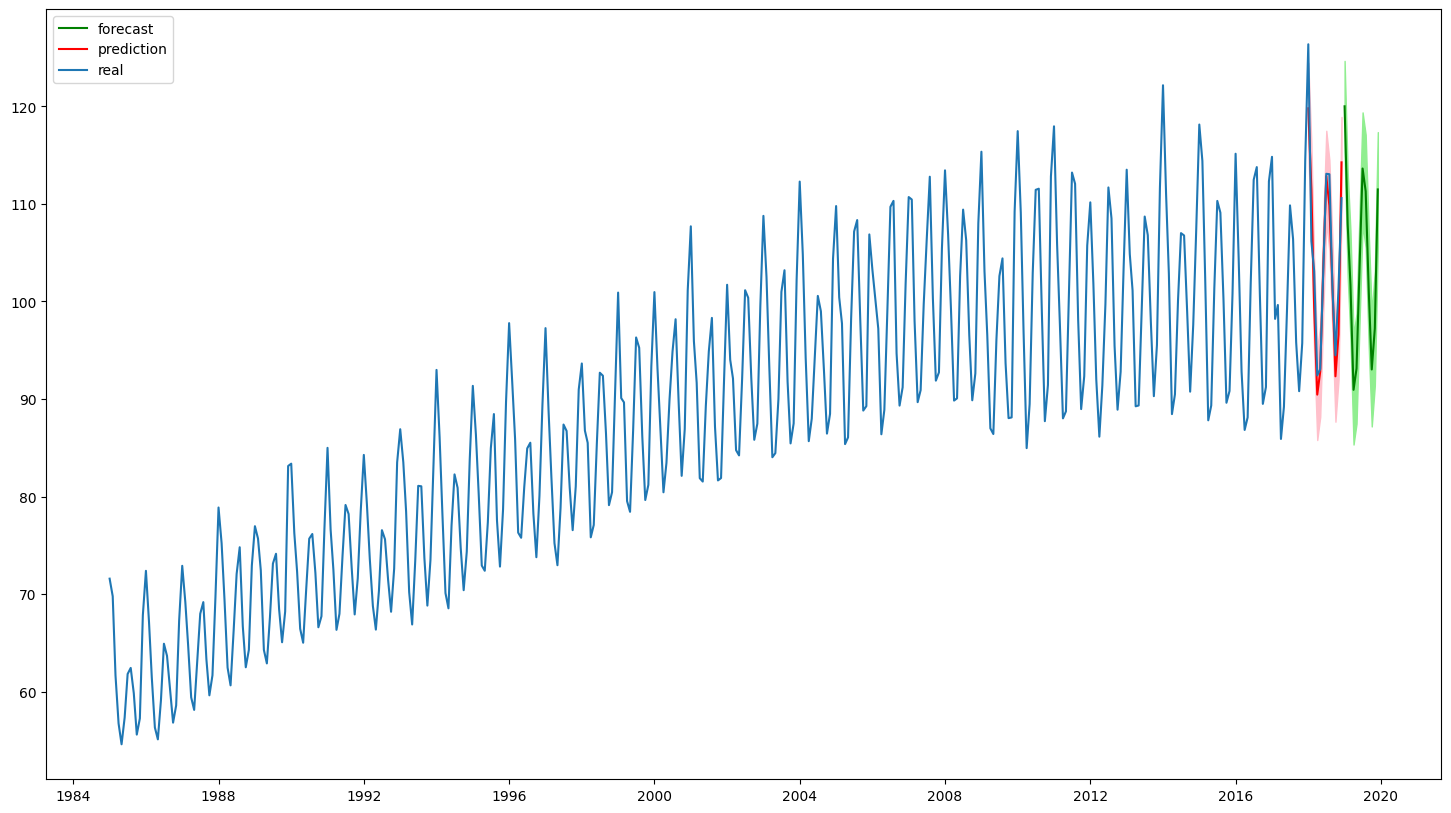

In [23]:
dates = np.asarray(df.index)
plt.figure(figsize=(18, 10))
plt.plot(date_forecast, forecast_mean.values, color='green', label='forecast')
plt.fill_between(date_forecast, limit_min_fc, limit_max_fc, color='lightgreen')

plt.plot(date_predict, predict_mean.values, color='red', label='prediction')
plt.fill_between(date_predict, limit_min, limit_max, color='pink')

plt.plot(date, df.values, label='real')
plt.legend(loc='upper left')
plt.show()

In [24]:
from xgboost import XGBRegressor

train      = df.loc[df.index < '2016-12-31']
validation = df.loc[df.index > '2016-12-31']

train.shape, validation.shape

((384, 1), (24, 1))

In [25]:
train.head(5)

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [26]:
train['target'] =  train['energy'].shift(-1)
train.head(3)

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\2574055025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target'] =  train['energy'].shift(-1)


,energy,target
DATE,,
1985-01-01,71.592,69.7870
1985-02-01,69.787,61.6790
1985-03-01,61.679,56.7479


In [27]:
# train[train.isnull().any(axis=1)]
train[~train.notnull().all(axis=1)]

,energy,target
DATE,,
2016-12-01,112.3141,NaN


In [28]:
train.dropna(inplace=True)

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\167719433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True)


In [29]:
validation['target'] = validation['energy'].shift(-1)
validation.dropna(inplace=True)

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\3922996368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['target'] = validation['energy'].shift(-1)
C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\3922996368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation.dropna(inplace=True)


In [30]:
X_train      = train.loc[:, ['energy']].values
y_train      = train.loc[:, ['target']].values
X_validation = validation.loc[:, ['energy']].values
y_validation = validation.loc[:, ['target']].values

In [31]:
model_xgba = XGBRegressor()
model_xgba.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
validation.iloc[0]

energy    114.8282
target     98.2191
Name: 2017-01-01 00:00:00, dtype: float64

In [33]:
predict = model_xgba.predict(X_validation)
predict

array([103.05468 ,  89.6212  , 108.89758 ,  79.16283 ,  93.78335 ,
        99.628296, 101.583725, 110.23003 , 106.858765,  98.68999 ,
       106.858765, 103.05468 , 110.27728 ,  97.96312 , 103.55588 ,
        96.872536,  86.97877 , 105.77548 , 114.146774, 114.146774,
       111.32476 ,  97.687325, 111.32476 ], dtype=float32)

In [34]:
validation['pred'] = predict
validation.head(5)

C:\Users\jeanl\AppData\Local\Temp\ipykernel_9332\3892858281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['pred'] = predict


,energy,target,pred
DATE,,,
2017-01-01,114.8282,98.2191,103.054680
2017-02-01,98.2191,99.6408,89.621201
2017-03-01,99.6408,85.9106,108.897583
2017-04-01,85.9106,89.2053,79.162827
2017-05-01,89.2053,99.1945,93.783348


In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(X_validation, predict)

6.86671642747962